## - Code to draw a number and then have the trained model predict the number -

### - Import data -

In [1]:
import tkinter as tk
from PIL import Image, ImageDraw ## Issue with __init__.py being an empty stub for PIL so can't use PIL.func in some cases
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### - Define functions

In [2]:
def predict():
    """ Function saves the drawing and makes prediction """
    ## Want the pixel_values and prediction to be global for saving in correct() function. 
    global pixel_values, predict
    
    ## Rescale image to 28 by 28 in size for the neural network input
    new_image = image1.resize((28,28))
    
    ## Obtain the pixel values of the image
    pixel_values = list(new_image.getdata())
    width, height = new_image.size
    
    ## One channel as only want greyscale image
    channels = 1 
    
    ## Reshape the pixel values into appropriate array for neural network
    pixel_values = np.array(pixel_values).reshape((width, height, channels))
    
    ## Input shape needed depends on whether the model is just a dense NN or a CNN
    shape = np.flip(np.array(reloaded.layers[0].input.get_shape()),0)
    test_matrix = np.reshape(pixel_values, shape[:-1])
    
    ## Predict the number
    predict = np.argmax(reloaded.predict(test_matrix), axis = 1);
    
    ## Delete the text and put prediction in widget
    text_box.delete(1.0, "end-1c")
    text_box.insert("end-1c", "prediction = "+str(predict))
    
    ## Print image and prediction to notebook
    image_matrix = np.reshape(pixel_values,(28,28))
    plt.imshow(image_matrix)
    plt.show()
    print("prediction ", predict)

    
def clear():
    """ Clears the canvas """
    ## Clears the paint from the canvas
    cv.delete('all')
    ## Draws a black rectangle in the PIL image
    draw.rectangle((0, 0, 280, 280), fill='black')
    
    
def correct():
    """ If the model correctly predicts the number, 
    the user can press this button and the image and label 
    will be saved to a dataset to potentially be used to train the model further. """
    new_entry=np.array(pixel_values).reshape(1,28*28)

    try: ## Check if file exists. If not, then create the file with the labels
        with open('new_data.csv','x') as f:
    
            ## Create the label string
            headerstring='ImageID,'
            for i in range(len(new_entry[0])-1):
                newstring = 'pixel'+str(i)+','
                headerstring = headerstring + newstring
            finalstring = 'pixel'+str(len(new_entry[0]))
            headerstring = headerstring + finalstring
            
            ## Save the label and pixel array
            np.savetxt(f, 
               np.c_[predict, new_entry],
               delimiter = ',', 
               header = headerstring, 
               comments = '', 
               fmt = '%d')
            f.close()
    except: ## If file exists, then just append. Don't add a label line
        with open('new_data.csv','a') as f:
            np.savetxt(f, 
               np.c_[predict, new_entry],
               delimiter = ',', 
               comments = '', 
               fmt = '%d')
            f.close()
            
            
def activate_paint(e):
    """ Activates the paint function """
    global lastx, lasty
    cv.bind('<B1-Motion>', paint)
    lastx, lasty = e.x, e.y


def paint(e):
    """ Paints the lines """
    global lastx, lasty
    penwidth = 20
    x, y = e.x, e.y
    cv.create_line((lastx, lasty, x, y), width=penwidth, fill='white')
    #  --- PIL
    draw.line((lastx, lasty, x, y), fill='white', width=penwidth)
    lastx, lasty = x, y

### - Load in the tensorflow model -

In [3]:
tf.keras.backend.clear_session()

export_path_keras = "saved_model.h5"
reloaded = tf.keras.models.load_model(export_path_keras)
reloaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

### - Set up Tkinter canvas -

In [4]:
root = tk.Tk()
lastx, lasty = None, None
image_number = 0

cv = tk.Canvas(root, width=280, height=280, bg='black')

#### Creates a Pillow Image to then use in the neural network

In [5]:
image1 = Image.new('L', (280,280), 'black') ##'RGB'
draw = ImageDraw.Draw(image1)

#### Binds activate paint to the canvas

In [6]:
cv.bind('<1>', activate_paint)
cv.pack(expand='YES', fill='both')

#### Creates a button to call the prediction function

In [7]:
btn_save = tk.Button(text="predict", command=predict)
btn_save.pack()

#### Creates a button to clear the canvas to draw new number

In [8]:
btn_clear = tk.Button(text="clear", command=clear)
btn_clear.pack()

#### Creates a button to be clicked if output correct

In [9]:
btn_correct = tk.Button(text="Click if correct", command=correct)
btn_correct.pack()

#### Creates a text box to show the predicted number

In [10]:
text_box = tk.Text(root, width = 25, height = 2)
text_box.insert("end-1c", "Number prediction")
text_box.pack()

### - Starts the number drawing widget in new pop up window -

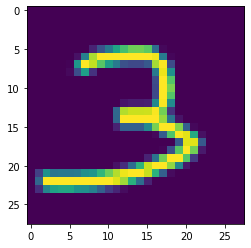

prediction  [3]


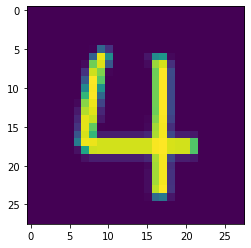

prediction  [4]


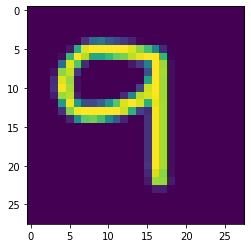

prediction  [7]


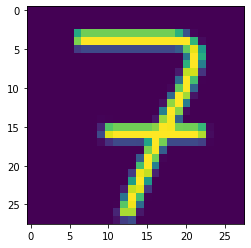

prediction  [7]


In [11]:
root.mainloop()